In [1]:
import pandas as pd
import numpy as np

### load data

In [2]:
df = pd.read_csv('/Users/chenjiqing/Public/bladder cancer/ML used/AllBC_10OS_NoWin.csv')
df

,sex,SurgToBlood,TenDead,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,...,MLR,CD4_to_8,CD4mem_to_nv,CD8mem_to_nv,Tmem_to_nv,Age,TumorGrade,MuscleInvasive,SmokingStat,BCGtrt
0,male,757.0,1,2.54,0.00,3.14,1.58,0.91,3.34,0.26,...,0.795181,0.691667,1.736264,12.846154,4.205128,69,Grade 3 + 4,no,ever-smoker,With Immuno
1,male,739.0,1,2.75,0.53,3.27,11.72,0.00,10.27,0.31,...,0.229167,1.108696,1172.000000,33.129032,70.935484,67,Grade 1 + 2,no,ever-smoker,Without Immuno
2,female,212.0,0,1.62,0.00,2.56,12.11,7.04,5.55,0.99,...,0.168013,2.928135,1.720170,5.606061,2.199253,69,Grade 1 + 2,no,non-smoker,With Immuno
3,male,650.0,0,0.64,0.00,3.57,18.72,0.41,13.39,1.04,...,0.051025,1.325710,45.658537,12.875000,22.144828,63,Grade 1 + 2,no,ever-smoker,Without Immuno
4,male,571.0,1,6.34,0.83,7.04,11.36,1.26,1.23,1.72,...,0.432534,4.583051,9.015873,0.715116,4.224832,61,Grade 1 + 2,no,ever-smoker,Without Immuno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,male,134.0,0,1.19,0.00,2.13,5.58,3.50,2.94,0.52,...,0.629944,2.624277,1.594286,5.653846,2.119403,61,Grade 1 + 2,no,ever-smoker,Without Immuno
674,female,815.0,0,2.19,2.64,6.80,20.84,5.45,0.00,4.65,...,0.188706,5.653763,3.823853,0.000000,2.063366,60,Grade 1 + 2,no,non-smoker,Without Immuno
675,male,78.0,0,2.28,0.31,9.63,8.83,3.26,1.39,2.53,...,0.332068,3.102041,2.708589,0.549407,1.765112,50,Grade 1 + 2,no,non-smoker,Without Immuno
676,male,381.0,0,3.26,0.00,5.18,11.35,3.57,1.19,1.83,...,0.203826,4.940397,3.179272,0.650273,2.322222,67,Grade 3 + 4,no,ever-smoker,Without Immuno


In [3]:
df.columns

Index(['sex', 'SurgToBlood', 'TenDead', 'Bas', 'Bmem', 'Bnv', 'CD4mem',
       'CD4nv', 'CD8mem', 'CD8nv', 'Eos', 'Mono', 'Neu', 'NK', 'Treg', 'CD4',
       'CD8', 'Bcell', 'MemT', 'MemAll', 'NvT', 'NvAll', 'T_cell', 'Lymph',
       'CD4T', 'NLR', 'MLR', 'CD4_to_8', 'CD4mem_to_nv', 'CD8mem_to_nv',
       'Tmem_to_nv', 'Age', 'TumorGrade', 'MuscleInvasive', 'SmokingStat',
       'BCGtrt'],
      dtype='object')

### remove the variables that are not used in training

In [4]:
df.drop(['SurgToBlood','CD4', 'CD8', 'Bcell','MemT','MemAll','NvT','NvAll','T_cell','Lymph','CD4T','MLR', 'CD4_to_8',
         'CD4mem_to_nv','CD8mem_to_nv','Tmem_to_nv'],axis=1,inplace=True)
df.columns

Index(['sex', 'TenDead', 'Bas', 'Bmem', 'Bnv', 'CD4mem', 'CD4nv', 'CD8mem',
       'CD8nv', 'Eos', 'Mono', 'Neu', 'NK', 'Treg', 'NLR', 'Age', 'TumorGrade',
       'MuscleInvasive', 'SmokingStat', 'BCGtrt'],
      dtype='object')

In [5]:
df.dtypes

sex                object
TenDead             int64
Bas               float64
Bmem              float64
Bnv               float64
CD4mem            float64
CD4nv             float64
CD8mem            float64
CD8nv             float64
Eos               float64
Mono              float64
Neu               float64
NK                float64
Treg              float64
NLR               float64
Age                 int64
TumorGrade         object
MuscleInvasive     object
SmokingStat        object
BCGtrt             object
dtype: object

### Although it is ok to have whitespace in the value in 'grade2', and 'ImmunoTx'for XGBoost and classification, we can't have any whitespace if we want to draw a tree.

In [6]:
df.replace(' ','_',regex=True, inplace=True)
df.head()

,sex,TenDead,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Eos,Mono,Neu,NK,Treg,NLR,Age,TumorGrade,MuscleInvasive,SmokingStat,BCGtrt
0,male,1,2.54,0.00,3.14,1.58,0.91,3.34,0.26,4.83,11.22,66.68,4.88,0.00,4.725726,69,Grade_3_+_4,no,ever-smoker,With_Immuno
1,male,1,2.75,0.53,3.27,11.72,0.00,10.27,0.31,0.74,7.37,56.91,6.05,0.01,1.769590,67,Grade_1_+_2,no,ever-smoker,Without_Immuno
2,female,0,1.62,0.00,2.56,12.11,7.04,5.55,0.99,0.97,5.20,61.14,2.70,0.00,1.975444,69,Grade_1_+_2,no,non-smoker,With_Immuno
3,male,0,0.64,0.00,3.57,18.72,0.41,13.39,1.04,0.00,2.09,55.57,3.83,0.00,1.356689,63,Grade_1_+_2,no,ever-smoker,Without_Immuno
4,male,1,6.34,0.83,7.04,11.36,1.26,1.23,1.72,3.39,11.54,54.42,2.34,0.90,2.039730,61,Grade_1_+_2,no,ever-smoker,Without_Immuno


### The columns of data that we will use to make classifications

In [7]:
X = df.drop('TenDead',axis=1).copy()
X.head()

,sex,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Eos,Mono,Neu,NK,Treg,NLR,Age,TumorGrade,MuscleInvasive,SmokingStat,BCGtrt
0,male,2.54,0.00,3.14,1.58,0.91,3.34,0.26,4.83,11.22,66.68,4.88,0.00,4.725726,69,Grade_3_+_4,no,ever-smoker,With_Immuno
1,male,2.75,0.53,3.27,11.72,0.00,10.27,0.31,0.74,7.37,56.91,6.05,0.01,1.769590,67,Grade_1_+_2,no,ever-smoker,Without_Immuno
2,female,1.62,0.00,2.56,12.11,7.04,5.55,0.99,0.97,5.20,61.14,2.70,0.00,1.975444,69,Grade_1_+_2,no,non-smoker,With_Immuno
3,male,0.64,0.00,3.57,18.72,0.41,13.39,1.04,0.00,2.09,55.57,3.83,0.00,1.356689,63,Grade_1_+_2,no,ever-smoker,Without_Immuno
4,male,6.34,0.83,7.04,11.36,1.26,1.23,1.72,3.39,11.54,54.42,2.34,0.90,2.039730,61,Grade_1_+_2,no,ever-smoker,Without_Immuno


### Turn categorical variable into continuous variables for XGBoost requirement

In [8]:
X2 = X.assign(sex = np.where(X['sex']=='male',0,1),
             TumorGrade = np.where(X['TumorGrade']=='Grade_1_+_2',0,1),
             MuscleInvasive = np.where(X['MuscleInvasive']=='no',0,1),
             SmokingStat = np.where(X['SmokingStat']=='non-smoker',0,1),
             BCGtrt = np.where(X['BCGtrt']=='Without_Immuno',0,1)).copy()
X2.head()

,sex,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Eos,Mono,Neu,NK,Treg,NLR,Age,TumorGrade,MuscleInvasive,SmokingStat,BCGtrt
0,0,2.54,0.00,3.14,1.58,0.91,3.34,0.26,4.83,11.22,66.68,4.88,0.00,4.725726,69,1,0,1,1
1,0,2.75,0.53,3.27,11.72,0.00,10.27,0.31,0.74,7.37,56.91,6.05,0.01,1.769590,67,0,0,1,0
2,1,1.62,0.00,2.56,12.11,7.04,5.55,0.99,0.97,5.20,61.14,2.70,0.00,1.975444,69,0,0,0,1
3,0,0.64,0.00,3.57,18.72,0.41,13.39,1.04,0.00,2.09,55.57,3.83,0.00,1.356689,63,0,0,1,0
4,0,6.34,0.83,7.04,11.36,1.26,1.23,1.72,3.39,11.54,54.42,2.34,0.90,2.039730,61,0,0,1,0


In [9]:
X2.dtypes

sex                 int64
Bas               float64
Bmem              float64
Bnv               float64
CD4mem            float64
CD4nv             float64
CD8mem            float64
CD8nv             float64
Eos               float64
Mono              float64
Neu               float64
NK                float64
Treg              float64
NLR               float64
Age                 int64
TumorGrade          int64
MuscleInvasive      int64
SmokingStat         int64
BCGtrt              int64
dtype: object

In [10]:
X2.describe()

,sex,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Eos,Mono,Neu,NK,Treg,NLR,Age,TumorGrade,MuscleInvasive,SmokingStat,BCGtrt
count,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.00000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000
mean,0.246313,1.776814,0.453953,3.451799,10.064749,2.924204,4.534041,1.889926,0.560147,6.550664,62.80385,3.779012,0.274292,17.983447,63.382006,0.317109,0.113569,0.824484,0.134218
std,0.431181,1.142406,0.986347,2.266947,6.800387,2.614074,4.256575,1.766402,1.165345,3.218448,12.25936,2.143883,0.563409,349.933931,9.630397,0.465694,0.317522,0.380689,0.341138
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.48000,0.000000,0.000000,0.224706,29.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.060000,0.000000,1.932500,5.080000,1.052500,1.560000,0.520000,0.000000,4.372500,55.83000,2.240000,0.000000,1.617771,58.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.710000,0.000000,3.100000,9.055000,2.350000,3.215000,1.455000,0.000000,6.500000,63.18000,3.410000,0.000000,2.379590,66.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,2.427500,0.550000,4.560000,13.237500,4.095000,6.535000,2.777500,0.677500,8.467500,71.47750,4.870000,0.307500,3.858954,71.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,10.850000,10.700000,15.030000,38.220000,23.330000,28.220000,9.550000,9.260000,21.960000,94.06000,14.340000,4.860000,9081.000000,79.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
print(X2.isnull().sum())

sex               0
Bas               0
Bmem              0
Bnv               0
CD4mem            0
CD4nv             0
CD8mem            0
CD8nv             0
Eos               0
Mono              0
Neu               0
NK                0
Treg              0
NLR               0
Age               0
TumorGrade        0
MuscleInvasive    0
SmokingStat       0
BCGtrt            0
dtype: int64


## Rescale

In [12]:
from sklearn.preprocessing import RobustScaler, normalize
RS = RobustScaler()
X3 = RS.fit_transform(X2)

In [13]:
X4 = pd.DataFrame(X3,columns=X2.columns)
X4

,sex,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Eos,Mono,Neu,NK,Treg,NLR,Age,TumorGrade,MuscleInvasive,SmokingStat,BCGtrt
0,0.0,0.606947,0.000000,0.015224,-0.916335,-0.473295,0.025126,-0.529347,7.129151,1.152625,0.223678,0.558935,0.000000,1.046830,0.230769,1.0,0.0,0.0,1.0
1,0.0,0.760512,0.963636,0.064700,0.326693,-0.772391,1.418090,-0.507198,1.092251,0.212454,-0.400703,1.003802,0.032520,-0.272178,0.076923,0.0,0.0,0.0,0.0
2,1.0,-0.065814,0.000000,-0.205519,0.374502,1.541495,0.469347,-0.205980,1.431734,-0.317460,-0.130372,-0.269962,0.000000,-0.180327,0.230769,0.0,0.0,-1.0,1.0
3,0.0,-0.782450,0.000000,0.178877,1.184799,-0.637634,2.045226,-0.183832,0.000000,-1.076923,-0.486340,0.159696,0.000000,-0.456411,-0.230769,0.0,0.0,0.0,0.0
4,0.0,3.385740,1.509091,1.499524,0.282562,-0.358258,-0.398995,0.117386,5.003690,1.230769,-0.559834,-0.406844,2.926829,-0.151643,-0.384615,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,0.0,-0.380256,0.000000,-0.369172,-0.425988,0.377979,-0.055276,-0.414175,5.107011,1.135531,0.126538,-0.144487,0.000000,0.580839,-0.384615,0.0,0.0,0.0,0.0
674,1.0,0.351005,4.800000,1.408183,1.444683,1.018899,-0.646231,1.415282,0.000000,0.371184,-1.091548,-0.490494,0.000000,-0.577768,-0.461538,0.0,0.0,-1.0,0.0
675,0.0,0.416819,0.563636,2.485252,-0.027582,0.299096,-0.366834,0.476190,0.044280,0.761905,-0.291420,-0.174905,0.227642,-0.158897,-1.230769,0.0,0.0,-1.0,0.0
676,0.0,1.133455,0.000000,0.791627,0.281336,0.400986,-0.407035,0.166113,4.059041,-0.234432,-0.212174,0.247148,0.000000,-0.079081,0.076923,1.0,0.0,0.0,0.0


### The column of data that we want to predict.

In [14]:
#y = df.assign(RecOrProg = np.where(df['RecOrProg']=='yes',1,0))['RecOrProg'].copy()
y = df['TenDead'].copy()
y.head()

0    1
1    1
2    0
3    0
4    1
Name: TenDead, dtype: int64

### Now we simply split the data into training and testing sets and build the model. However, first, let's observe that this data is imbalanced by dividing the number of people who has tumor recurrence or progression, where y =1, by the total number of people in the dataset.

In [15]:
sum(y)/len(y)

0.336283185840708

### 30% of the NMIBC patients in the dataset have deceased within 10 year. We can split using stratification in order to maintain tha same percentage of NMIBC patients who have deceased in both the training set and the testing set.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X4,y,random_state=42,stratify = y,test_size=0.2)

In [17]:
print(sum(y_train)/len(y_train))
print(sum(y_test)/len(y_test))

0.33579335793357934
0.3382352941176471


In [18]:
import xgboost as xgb
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [23]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',missing=None,seed=42)
clf_xgb.fit(X_train,
            y_train,
            verbose = True,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.69988
[1]	validation_0-auc:0.69698
[2]	validation_0-auc:0.72259
[3]	validation_0-auc:0.70749
[4]	validation_0-auc:0.71377
[5]	validation_0-auc:0.71908
[6]	validation_0-auc:0.70580
[7]	validation_0-auc:0.71908
[8]	validation_0-auc:0.72246
[9]	validation_0-auc:0.71642
[10]	validation_0-auc:0.70918
[11]	validation_0-auc:0.72150


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

### How it performms on the testing Dataset by running the Testing Dataset down the model and drawing a Confusion Matrix

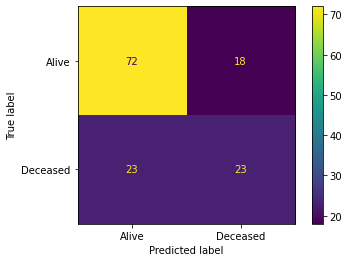

In [24]:
plot_confusion_matrix(clf_xgb,
                      X_test, 
                      y_test, 
                      values_format='d',
                      display_labels=['Alive','Deceased'])

### 90 Bladder cancer patients who alived, 72 (80%) were correctly classified. And of the 46 Bladder cancer patients that deceased, 23 (50%) were correctly classified. So the XGBoost model was not awesomme. Part of the problem is that our data is imbalanced. We care about predicting who will die or recurrence, we would like to capture mmore of the NMIBC patients that deceased. XGBoost has a parameter, scale_pos_weight, that helps with imbalanced data.

# Optimize Parameters using Cross Validation and GridSearch()

In [22]:
# Round 1
param_grid = {
    'max_depth':[3,4,5,6,7],
    'learning_rate':[0.1,0.05,0.01,0.005,0.001],
    'gamma':[0,0.1,0.3,0.5,0.7],
    'reg_lambda':[0,0.5,1.0,5.0,10],
    'scale_pos_weight':[1,3,5,7,9]
}

## To speed up cross validation, and to further prevent overfitting. We are only using a random subset of the data (90%) and are only using a random subset of the features (columns) (50%) per tree.

In [25]:
optimal_params = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                          seed = 42,
                                                          subsample=0.9,
                                                          colsample_bytree=0.5),
                             param_grid=param_grid,
                             scoring='roc_auc',
                             verbose=0,
                             n_jobs = 10,
                             cv = 5)
optimal_params.fit(X_train,
            y_train,
            verbose = False,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test,y_test)])
print(optimal_params.best_params_)
print(optimal_params.best_score_)

/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 5.0, 'scale_pos_weight': 1}


NameError: name 'optimal_params2' is not defined

### first round: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 5.0, 'scale_pos_weight': 1}

In [21]:
# Round 2
param_grid2 = {
    'max_depth':[4,5,6,7],
    'learning_rate':[0.05,0.1,0.15],
    'gamma':[0.05,0.1,0.15],
    'reg_lambda':[5,6,7,8],
    'scale_pos_weight':[3,4]
}

In [22]:
optimal_params2 = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                          seed = 42,
                                                          subsample=0.9,
                                                          colsample_bytree=0.5),
                             param_grid=param_grid2,
                             scoring='roc_auc',
                             verbose=0,
                             n_jobs = 10,
                             cv = 5)
optimal_params2.fit(X_train,
            y_train,
            verbose = False,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test,y_test)])
print(optimal_params2.best_params_)
print(optimal_params2.best_score_)

{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 6, 'scale_pos_weight': 2}
0.7820945945945945


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### second round: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 6, 'scale_pos_weight': 2}

# Building, Evaluating, Drawing, and interpreting the optimal XGBoost model

In [38]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',seed=42,
                            gamma=0.1, learning_rate = 0.1, max_depth = 5,
                            reg_lambda=6, scale_pos_weight =2.8)
clf_xgb.fit(X_train,
            y_train,
            verbose = True,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.70423
[1]	validation_0-auc:0.69517
[2]	validation_0-auc:0.71932
[3]	validation_0-auc:0.70725


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[4]	validation_0-auc:0.71292
[5]	validation_0-auc:0.70676
[6]	validation_0-auc:0.71642
[7]	validation_0-auc:0.71981
[8]	validation_0-auc:0.71051
[9]	validation_0-auc:0.72331
[10]	validation_0-auc:0.73007
[11]	validation_0-auc:0.73345
[12]	validation_0-auc:0.73128
[13]	validation_0-auc:0.72524
[14]	validation_0-auc:0.72621
[15]	validation_0-auc:0.72862
[16]	validation_0-auc:0.72826
[17]	validation_0-auc:0.72923
[18]	validation_0-auc:0.73019
[19]	validation_0-auc:0.72995
[20]	validation_0-auc:0.72560


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=6, scale_pos_weight=2.8, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [39]:
clf_xgb.best_ntree_limit

12

## Refit the classifier with the number of trees from the best round.

In [40]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',seed=41,
                            gamma=0.1, learning_rate = 0.1, max_depth = 5,
                            reg_lambda=6, scale_pos_weight =2.8,n_estimators=12)
clf_xgb.fit(X_train,
            y_train)

[14:09:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=12, n_jobs=4, num_parallel_tree=1, random_state=41,
              reg_alpha=0, reg_lambda=6, scale_pos_weight=2.8, seed=41,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [41]:
y_pred = clf_xgb.predict_proba(X_test)[:, 1]
roc_auc_score(y_test,y_pred)

0.7334541062801931

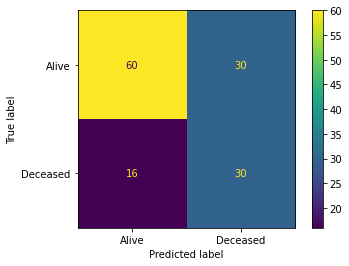

In [42]:
plot_confusion_matrix(clf_xgb,
                      X_test, 
                      y_test, 
                      values_format='d',
                      display_labels=['Alive','Deceased'])

### 90 Bladder cancer patients who alived, 61 (68%) were correctly classified. And of the 46 Bladder cancer patients that deceased, 33 (72%) were correctly classified. So the XGBoost model was not awesomme. Part of the problem is that our data is imbalanced. We care about predicting who will die or recurrence, we would like to capture mmore of the NMIBC patients that deceased. XGBoost has a parameter, scale_pos_weight, that helps with imbalanced data.

In [43]:
clf_xgb.feature_importances_

array([0.04595569, 0.05541733, 0.03539479, 0.04681085, 0.03189711,
       0.03817604, 0.03345041, 0.04487412, 0.02604991, 0.04620339,
       0.04687992, 0.03001607, 0.03960843, 0.16331843, 0.13176377,
       0.05328215, 0.09764674, 0.03325488, 0.        ], dtype=float32)

In [44]:
clf_xgb.importance_type

'gain'

In [45]:
clf_xgb.score(X_test, y_test)

0.6617647058823529

## Explain the model's predictions on the entire dataset

In [46]:
import shap
explainer = shap.TreeExplainer(clf_xgb)
shap_values = explainer.shap_values(X_train)

## SHAP Summary Plot

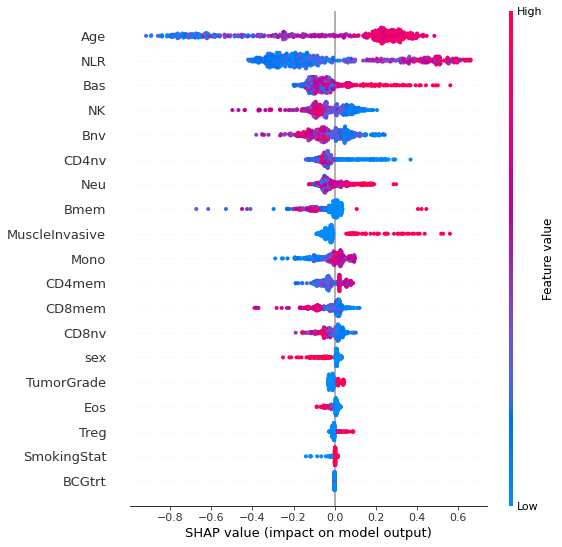

In [47]:
import matplotlib.pyplot as plt
shap.summary_plot(shap_values, X_train,max_display=X_train.shape[1], show=False)
#plt.savefig('scratch.png')

## SHAP Dependence Plots

In [69]:
X_train2 = X_train.assign(sex = np.where(X_train['sex']==0,'male','female'),
             TumorGrade = np.where(X_train['TumorGrade']==0,'Grade 1+2','Grade 3+4'),
             MuscleInvasive = np.where(X_train['MuscleInvasive']==0,'NMIBC','MIBC'),
             SmokingStat = np.where(X_train['SmokingStat']==0,'non-smoker','ever-smoker'),
             BCGtrt = np.where(X_train['BCGtrt']==0,'Without BCG','With BCG')).copy()
X_train2.head(11)

,sex,SurgToBlood,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Eos,...,MLR,CD4_to_8,CD4mem_to_nv,CD8mem_to_nv,Tmem_to_nv,Age,TumorGrade,MuscleInvasive,SmokingStat,BCGtrt
298,male,-0.141145,0.058501,0.000000,-0.612750,-0.085198,-0.723090,0.232161,0.099668,1.033210,...,-0.136029,-0.428436,10.988475,0.109062,1.175433,-0.153846,Grade 1+2,NMIBC,non-smoker,Without BCG
86,female,0.234354,0.606947,3.145455,0.532826,-0.070487,1.406738,0.290452,0.764120,0.000000,...,-0.016974,-0.123779,-0.370251,-0.071053,-0.408049,-0.538462,Grade 1+2,NMIBC,non-smoker,Without BCG
263,male,0.335553,0.833638,0.000000,0.053283,0.142813,0.644207,-0.332663,0.976744,0.826568,...,0.394881,0.238365,-0.142428,-0.235849,-0.368977,-1.000000,Grade 1+2,NMIBC,non-smoker,Without BCG
539,male,-0.460719,0.906764,3.800000,1.183635,0.450506,0.726376,0.011055,0.622370,0.295203,...,-0.225211,0.332927,-0.054728,-0.122125,-0.177755,-0.461538,Grade 3+4,NMIBC,ever-smoker,Without BCG
623,male,2.223702,-0.840951,3.054545,0.540438,1.123506,2.682005,-0.290452,1.769657,0.000000,...,-0.906846,0.817408,-0.275435,-0.251939,-0.432559,0.153846,Grade 1+2,NMIBC,non-smoker,Without BCG
348,male,-0.527297,0.109689,1.727273,-0.567079,-0.818265,-0.772391,-0.587940,0.400886,0.000000,...,0.007279,0.213449,49.007825,-0.283955,-0.466714,-0.384615,Grade 3+4,NMIBC,non-smoker,Without BCG
366,male,1.075899,-1.250457,0.000000,-0.647003,0.347533,0.516023,-0.531658,0.507198,0.000000,...,-0.951493,1.305630,-0.004354,-0.268676,-0.246907,0.538462,Grade 3+4,NMIBC,non-smoker,Without BCG
401,male,-0.484687,-1.250457,0.000000,-0.353949,-0.543671,-0.506163,-0.250251,-0.485050,0.000000,...,0.750478,0.018964,0.552700,0.564358,0.802230,-0.615385,Grade 3+4,NMIBC,ever-smoker,Without BCG
387,male,0.026631,0.438757,1.109091,-0.121789,-0.676065,-0.772391,1.968844,-0.644518,0.000000,...,-0.101100,-0.908242,73.204486,206.012529,465.787092,-1.230769,Grade 3+4,MIBC,ever-smoker,Without BCG
37,female,0.117177,0.138940,0.000000,-0.346337,-0.076617,0.673788,0.513568,0.148394,0.841328,...,-0.167719,-0.287765,-0.237404,0.207744,-0.138938,0.384615,Grade 1+2,NMIBC,non-smoker,With BCG


In [76]:
print(X_train.columns)
print(X_train2.columns)

Index(['sex', 'SurgToBlood', 'Bas', 'Bmem', 'Bnv', 'CD4mem', 'CD4nv', 'CD8mem',
       'CD8nv', 'Eos', 'Mono', 'Neu', 'NK', 'Treg', 'CD4', 'CD8', 'Bcell',
       'MemT', 'MemAll', 'NvT', 'NvAll', 'T_cell', 'Lymph', 'CD4T', 'CD8T',
       'NLR', 'MLR', 'CD4_to_8', 'CD4mem_to_nv', 'CD8mem_to_nv', 'Tmem_to_nv',
       'Age', 'TumorGrade', 'MuscleInvasive', 'SmokingStat', 'BCGtrt'],
      dtype='object')
Index(['sex', 'SurgToBlood', 'Bas', 'Bmem', 'Bnv', 'CD4mem', 'CD4nv', 'CD8mem',
       'CD8nv', 'Eos', 'Mono', 'Neu', 'NK', 'Treg', 'CD4', 'CD8', 'Bcell',
       'MemT', 'MemAll', 'NvT', 'NvAll', 'T_cell', 'Lymph', 'CD4T', 'CD8T',
       'NLR', 'MLR', 'CD4_to_8', 'CD4mem_to_nv', 'CD8mem_to_nv', 'Tmem_to_nv',
       'Age', 'TumorGrade', 'MuscleInvasive', 'SmokingStat', 'BCGtrt'],
      dtype='object')


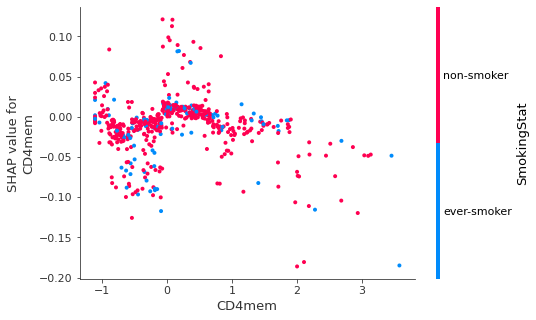

In [72]:
shap.dependence_plot("CD4mem", shap_values, X_train,interaction_index="SmokingStat",display_features=X_train2)

## Local interpretability

In [74]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[9,:], X_train2.iloc[9,:])

## Aggregated force_plot

In [75]:
shap.force_plot(explainer.expected_value, shap_values, X_train2)